In [1000]:
import pandas as pd
import numpy as np

In [1001]:
df=pd.read_excel(r'D:\Project\Mlproject\Data\ai_dev_assignment_tickets_complex_1000.xls')

In [1002]:
df.dropna(inplace=True)
df1=df.copy()

In [1003]:
from sklearn.feature_extraction.text import CountVectorizer

# Separate texts by urgency
texts_low = df1[df1['urgency_level']=='Low']['ticket_text']
texts_medium = df1[df1['urgency_level']=='Medium']['ticket_text']
texts_high = df1[df1['urgency_level']=='High']['ticket_text']

# Vectorizers for each class
vectorizer_low = CountVectorizer()
bow_low = vectorizer_low.fit_transform(texts_low)

vectorizer_medium = CountVectorizer()
bow_medium = vectorizer_medium.fit_transform(texts_medium)

vectorizer_high = CountVectorizer()
bow_high = vectorizer_high.fit_transform(texts_high)


In [1004]:
low_vocab = set(vectorizer_low.get_feature_names_out())
medium_vocab = set(vectorizer_medium.get_feature_names_out())
high_vocab = set(vectorizer_high.get_feature_names_out())

# Unique words per class
unique_low = low_vocab - (medium_vocab | high_vocab)
unique_medium = medium_vocab - (low_vocab | high_vocab)
unique_high = high_vocab - (low_vocab | medium_vocab)


c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.32105263157894737

Classification Report:
               precision    recall  f1-score   support

        High       0.29      0.35      0.32        66
         Low       0.41      0.21      0.28        66
      Medium       0.31      0.41      0.36        58

    accuracy                           0.32       190
   macro avg       0.34      0.32      0.32       190
weighted avg       0.34      0.32      0.32       190



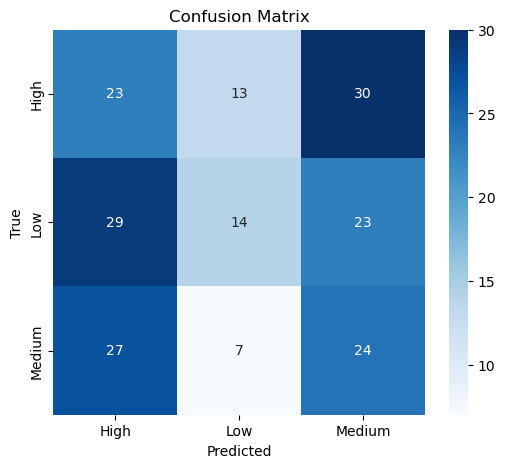

In [1020]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1. Load and preprocess data
# -----------------------------
df=pd.read_excel(r'D:\Project\Mlproject\Data\ai_dev_assignment_tickets_complex_1000.xls')  # replace with your dataset


# Handle NaN values safely
df = df.fillna({
    "ticket_text": "",          # empty string for missing text
    "issue_type": "Unknown",    # placeholder for missing issue type
    "product": "Unknown",       # placeholder for missing product
    "urgency_level": "Unknown"  # placeholder for missing urgency
})

# Drop rows where urgency_level is still missing/Unknown (can't train without target)
df = df[df["urgency_level"] != "Unknown"].copy()






# -----------------------------
# 2. Feature engineering
# -----------------------------
df['word_length'] = df['ticket_text'].apply(lambda x: len(str(x).split()))

# Extract number of days
def extract_days(text):
    match = re.search(r'(\d+)\s*days', str(text).lower())
    return int(match.group(1)) if match else 0

df['no_of_days'] = df['ticket_text'].apply(extract_days)

# Extract order number if present
def extract_order(text):
    match = re.search(r'order\s*#?(\d+)', str(text).lower())
    return int(match.group(1)) if match else 0

df['order_number'] = df['ticket_text'].apply(extract_order)

# One-hot encode product and issue_type
df_encoded = pd.get_dummies(df, columns=['product','issue_type'], drop_first=True)

# -----------------------------
# 3. Define features and target
# -----------------------------
X = df_encoded.drop(columns=['ticket_id','ticket_text','urgency_level'])
y = df_encoded['urgency_level']

# -----------------------------
# 4. Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------------
# 5. Train model
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -----------------------------
# 6. Evaluate
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# -----------------------------
# 8. Confusion matrix
# -----------------------------
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.5736842105263158

Classification Report:
               precision    recall  f1-score   support

        High       0.53      0.65      0.59        66
         Low       0.68      0.50      0.58        60
      Medium       0.55      0.56      0.56        64

    accuracy                           0.57       190
   macro avg       0.59      0.57      0.57       190
weighted avg       0.59      0.57      0.57       190



c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


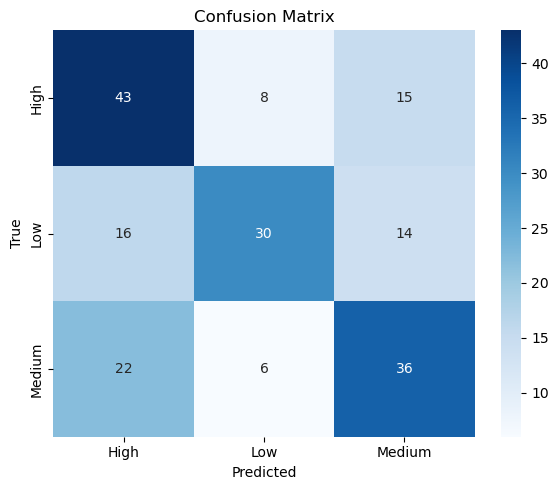

In [1021]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------
# 1) Load and handle NaNs
# -----------------------------
df=pd.read_excel(r'D:\Project\Mlproject\Data\ai_dev_assignment_tickets_complex_1000.xls')  # replace with your dataset

df = df.fillna({
    "ticket_text": "",
    "issue_type": "Unknown",
    "product": "Unknown",
    "urgency_level": "Unknown"
})

# Drop rows without usable target
df = df[df["urgency_level"] != "Unknown"].copy()

# -----------------------------
# 2) Text cleaning helpers
# -----------------------------
def clean_text(text):
    return re.sub(r"[^a-zA-Z0-9\s]", "", str(text).lower())

df["clean_text"] = df["ticket_text"].apply(clean_text)

# -----------------------------
# 3) Class-specific BoW (unique vocab per urgency)
# -----------------------------
low_texts = df[df["urgency_level"] == "Low"]["clean_text"]
med_texts = df[df["urgency_level"] == "Medium"]["clean_text"]
high_texts = df[df["urgency_level"] == "High"]["clean_text"]

vec_low = CountVectorizer()
vec_med = CountVectorizer()
vec_high = CountVectorizer()

vec_low.fit(low_texts)
vec_med.fit(med_texts)
vec_high.fit(high_texts)

vocab_low = set(vec_low.get_feature_names_out())
vocab_med = set(vec_med.get_feature_names_out())
vocab_high = set(vec_high.get_feature_names_out())

unique_low = vocab_low - (vocab_med | vocab_high)
unique_med = vocab_med - (vocab_low | vocab_high)
unique_high = vocab_high - (vocab_low | vocab_med)

def contains_unique(text, unique_words):
    tokens = set(text.split())
    return int(len(tokens & unique_words) > 0)

df["bow_low"] = df["clean_text"].apply(lambda x: contains_unique(x, unique_low))
df["bow_medium"] = df["clean_text"].apply(lambda x: contains_unique(x, unique_med))
df["bow_high"] = df["clean_text"].apply(lambda x: contains_unique(x, unique_high))

# -----------------------------
# 4) Structured features
# -----------------------------
df["word_length"] = df["ticket_text"].apply(lambda x: len(str(x).split()))

def extract_days(text):
    m = re.search(r"(\d+)\s*days", str(text).lower())
    return int(m.group(1)) if m else 0

df["no_of_days"] = df["ticket_text"].apply(extract_days)

def extract_order(text):
    m = re.search(r"order\s*#?(\d+)", str(text).lower())
    return int(m.group(1)) if m else 0

df["order_number"] = df["ticket_text"].apply(extract_order)

# -----------------------------
# 5) One-hot product and issue_type
# -----------------------------
df_encoded = pd.get_dummies(df, columns=["product", "issue_type"], drop_first=True)

# -----------------------------
# 6) Define features and target
# -----------------------------
drop_cols = ["ticket_id", "ticket_text", "clean_text", "urgency_level"]
X = df_encoded.drop(columns=[c for c in drop_cols if c in df_encoded.columns])
y = df_encoded["urgency_level"]

# -----------------------------
# 7) Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 8) Train model
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -----------------------------
# 9) Evaluate
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# -----------------------------
# 11) Confusion matrix
# -----------------------------
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [1007]:
# Assuming you already have X_test and y_pred
df_test = X_test.copy()
df_test["true_urgency"] = y_test.values
df_test["predicted_urgency"] = y_pred


In [1008]:
# Merge with original df to get ticket_text, issue_type, product
df_test = df_test.merge(
    df[["ticket_id", "ticket_text", "issue_type", "product"]],
    left_index=True, right_index=True, how="left"
)


In [1011]:
appliance_products = ["tv", "blender", "vacuum", "ac", "treadmill"]
df["appliance_related"] = df["product"].str.lower().apply(
    lambda x: int(any(appliance in x for appliance in appliance_products))
)


In [1012]:
usage_keywords = ["access", "install", "installation", "setup", "login"]
df["usage_related"] = df["ticket_text"].str.lower().apply(
    lambda x: int(any(word in x for word in usage_keywords))
)


In [1013]:
import re

# Feature 2: special_feature (count of ., !, , and ")
special_chars = ['.', '!',  '?']
df["number_of_sentence"] = df["ticket_text"].apply(
    lambda x: sum(x.count(ch) for ch in special_chars)
)


In [1014]:
df_encoded[['ticket_text', 'urgency_level']]=df[['ticket_text', 'urgency_level']].copy()

In [1015]:
X = df_encoded.drop(columns=["ticket_id","ticket_text","urgency_level"])
X = pd.concat([X, df[["appliance_related","usage_related",'number_of_sentence']]], axis=1)
y = df["urgency_level"]


c:\Users\abhis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6052631578947368

Classification Report:
               precision    recall  f1-score   support

        High       0.61      0.64      0.62        66
         Low       0.61      0.57      0.59        60
      Medium       0.60      0.61      0.60        64

    accuracy                           0.61       190
   macro avg       0.61      0.60      0.60       190
weighted avg       0.61      0.61      0.60       190



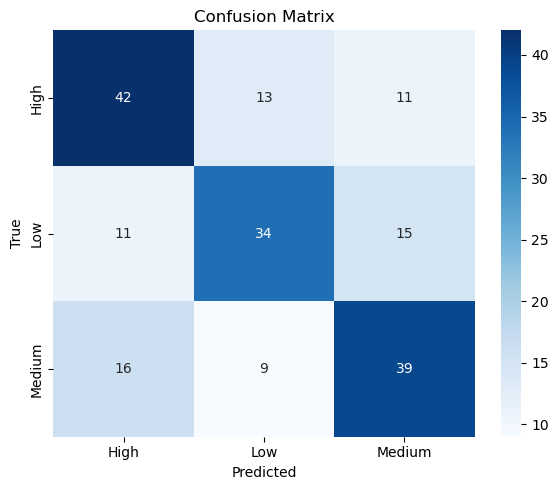

In [1016]:

# -----------------------------
# 7) Train/test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 8) Train model
# -----------------------------
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# -----------------------------
# 9) Evaluate
# -----------------------------
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# -----------------------------
# 11) Confusion matrix
# -----------------------------
labels = sorted(y.unique())
cm = confusion_matrix(y_test, y_pred, labels=labels)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


In [1017]:
X['urgency_level']=df_encoded['urgency_level']

In [1018]:
X.columns

Index(['bow_low', 'bow_medium', 'bow_high', 'word_length', 'no_of_days',
       'order_number', 'product_FitRun Treadmill', 'product_PhotoSnap Cam',
       'product_PowerMax Battery', 'product_ProTab X1',
       'product_RoboChef Blender', 'product_SmartWatch V2',
       'product_SoundWave 300', 'product_UltraClean Vacuum',
       'product_Vision LED TV', 'issue_type_Billing Problem',
       'issue_type_General Inquiry', 'issue_type_Installation Issue',
       'issue_type_Late Delivery', 'issue_type_Product Defect',
       'issue_type_Unknown', 'issue_type_Wrong Item', 'appliance_related',
       'usage_related', 'number_of_sentence', 'urgency_level'],
      dtype='object')